**In this notebook I plan on re-creating the math for which so far I've used Desmos as a visual aid. Doing this in python with the symbolic math module Sympy will be a huge help, especially for equation solving, organization, and for when I plan on exporting my findings to other applicaitons.**

**Imports...**

In [1]:
#importing Sympy...
from sympy import *
from sympy.vector import CoordSys3D
N = CoordSys3D('N')
init_printing()

**Symbols and vectors...**

In [2]:
#xyz space...
x = symbols('x')
y = symbols('y')
z = symbols('z')

#control frame...
p = symbols('p') #i'm using p for theta = rotation angle of the control frame
s = symbols('s') #s is the equal to ctrl frame length / face frame length
a = symbols('a') #a is the x-component of the c.f. position vector
b = symbols('b') #b is the y-component of the c.f. position vector
r = a*N.i + b*N.j + 0*N.k #r is the c.f. position vector
c = (sin(p))*N.i + (cos(p))*N.j + 0*N.k

#face frame
f = symbols('f') #f is the length of the face frame
k = symbols('k') #k is the fraction up the face frame that a whisker joint lies. 
                 # the y intercept lies on y = fk
y1 = symbols('y1')
#y1 = f*k

#parametrization symbols...
q = symbols('q')

**Orientation**

In [3]:
#orientations w.r.t. the y position... y1 = fk
u = (N.j - s*c)*y1 - r
u_norm = u.normalize()

In [4]:
#deriving my vectors with respect to y...
du = u.diff(y1)
du_norm = u_norm.diff(y1)
d2u_norm = du_norm.diff(y1)

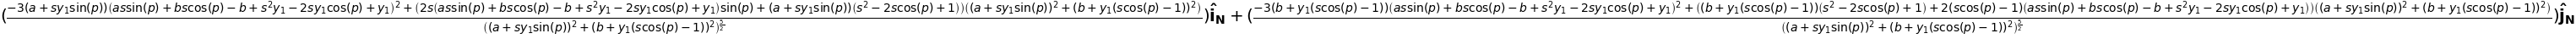

In [5]:
simplify(d2u_norm)

**Deriving the boundary curve**

In [6]:
#y-intercept-to-xy vector
ry = (x)*N.i + (y-y1)*N.j + 0*N.k

#perfoming the cross product...
parallel_exp = (u.cross(ry)).dot(N.k) #when this is equal to 0, xy are on a whisker line

#solving the quadratic...
boundary = Poly(parallel_exp,y1).discriminant()

**Parametrization**

In the first part here, I'll derive a vector function to traverse the boundary curve with respect to a single parameter q. This parametrization relies on projection of the conic eqn from one of its point onto a line, where one point is the boundary curve's y-intercept, and the other is the intersection of the curve and a line that passes through the y-intercept. This method was suggested to me by Professor Minhea Popa.

In the second part of this section, I'll try an alternate parametrization based on traversing the y axis, like with the vector u earlier. Hopefully it can turn out more elegantly than what I got for the other parametrization, but who knows!!

RESULT: Turns out the second part turned out MUCH more elegantly, owing to the fact that it came back full-circle to the definition of the vector u. This is very cool, but also a little frustrating because the math for computing protraction and spread was right in front of me literally from day 1...

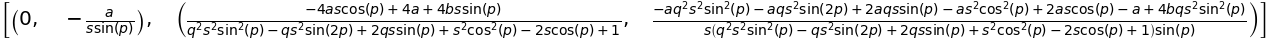

In [32]:
#PART 1: projection of the conic from one of its points onto a line
yint_line = q*x - y - a/(s*sin(p))

P1 = solve([yint_line,boundary],x,y)
P1

In [33]:
#comonents of the parametrized solution...
P1x = P1[1][0]
P1y = P1[1][1]

#calculating the derivatives...
P1xdq = Derivative(P1x,q)
P1ydq = Derivative(P1y,q)

In [35]:
#PART 2: intercept of y1-parametrized line and the boundary curve
u_line = (((1-s*cos(p))*y1-b)/((-s*sin(p))*y1-a))*x - y + y1
P2 = solve([u_line,boundary],x,y)

In [62]:
#components of the parametrized solution...
P2x = P2[0][0]
P2y = P2[0][1]

#calculating the derivatives...
P2xdy1 = P2x.diff(y1)
P2ydy1 = P2y.diff(y1)
P2dydx = P2ydy1/P2xdy1

In [83]:
#protraction angle with respect to y...
protract_y = trigsimp(atan(P2dydx))

#"spread" = dprotraction/dy...
spread_y = simplify(protract_y.diff(y1))

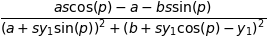

In [84]:
spread_y

**Investigating curvature from Parametrization 2**

In [95]:
#getting the second derivatives...
P2xd2y1 = P2xdy1.diff(y1)
P2yd2y1 = P2ydy1.diff(y1)

#curvature...
k = (P2xdy1*P2yd2y1-P2ydy1*P2xd2y1)/(((P2xdy1)**2+(P2ydy1)**2)**(3/2))

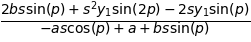

In [100]:
#P2yd2y1
P2ydy1

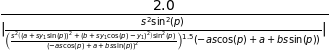

In [98]:
k = simplify(k)
R = simplify(1/abs(k))
trigsimp(R)